# 1. Import Library

In [372]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import re
import nltk
import spacy
import emoji
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 2. Memuat Dataset

In [373]:
# load data
data = pd.read_csv('data_komentar_youtube.csv')
data

,Username,Komentar,Timestamp,Likes,Original Text,Public
0,@blackberry1986,Coba dpr kalau mau buat undang&quot; bikin vot...,2025-03-25T03:07:32Z,0,"Coba dpr kalau mau buat undang"" bikin vote rak...",True
1,@UbaidillahAlhasani,mas adi dan bg pandji serti publik yg ada di k...,2025-03-19T21:29:18Z,0,mas adi dan bg pandji serti publik yg ada di k...,True
2,@BagasRyan-w5q,Kelas mas adi prayitno memang benar yg kalah g...,2025-03-17T19:06:15Z,0,Kelas mas adi prayitno memang benar yg kalah g...,True
3,@sahrulmeltas7551,Dari sini kita faham bahwa parpol nya tidak ma...,2025-03-14T07:38:22Z,0,Dari sini kita faham bahwa parpol nya tidak ma...,True
4,@SadegaTri,"Seneng lihat acara ini, tapi sedikit masih sda...",2025-03-09T18:48:53Z,0,"Seneng lihat acara ini, tapi sedikit masih sda...",True
...,...,...,...,...,...,...
18587,@whoami4767,Oh tempe,2025-03-22T00:54:53Z,5,Oh tempe,True
18588,@firmantuhan-k9o,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...",2025-03-22T00:34:47Z,46,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...",True
18589,@Local_indosuke2004,Presiden beban,2025-03-22T00:22:54Z,23,Presiden beban,True
18590,@andipamungkas3397,"Semangat terus tempo, jangan kalah sama teror ...",2025-03-21T23:39:37Z,96,"Semangat terus tempo, jangan kalah sama teror ...",True


# 3. Exploratory Data Analysis (EDA)

In [374]:
# informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18592 entries, 0 to 18591
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Username       18587 non-null  object
 1   Komentar       18592 non-null  object
 2   Timestamp      18592 non-null  object
 3   Likes          18592 non-null  int64 
 4   Original Text  18588 non-null  object
 5   Public         18592 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 744.5+ KB


In [375]:
# dataframe shape
data.shape

(18592, 6)

In [376]:
# melihat missing value
data.isnull().sum()

Username         5
Komentar         0
Timestamp        0
Likes            0
Original Text    4
Public           0
dtype: int64

In [377]:
# melihat data yang duplikat
data.duplicated().sum()

np.int64(8)

# 4. Data Preprocessing

In [378]:
data

,Username,Komentar,Timestamp,Likes,Original Text,Public
0,@blackberry1986,Coba dpr kalau mau buat undang&quot; bikin vot...,2025-03-25T03:07:32Z,0,"Coba dpr kalau mau buat undang"" bikin vote rak...",True
1,@UbaidillahAlhasani,mas adi dan bg pandji serti publik yg ada di k...,2025-03-19T21:29:18Z,0,mas adi dan bg pandji serti publik yg ada di k...,True
2,@BagasRyan-w5q,Kelas mas adi prayitno memang benar yg kalah g...,2025-03-17T19:06:15Z,0,Kelas mas adi prayitno memang benar yg kalah g...,True
3,@sahrulmeltas7551,Dari sini kita faham bahwa parpol nya tidak ma...,2025-03-14T07:38:22Z,0,Dari sini kita faham bahwa parpol nya tidak ma...,True
4,@SadegaTri,"Seneng lihat acara ini, tapi sedikit masih sda...",2025-03-09T18:48:53Z,0,"Seneng lihat acara ini, tapi sedikit masih sda...",True
...,...,...,...,...,...,...
18587,@whoami4767,Oh tempe,2025-03-22T00:54:53Z,5,Oh tempe,True
18588,@firmantuhan-k9o,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...",2025-03-22T00:34:47Z,46,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...",True
18589,@Local_indosuke2004,Presiden beban,2025-03-22T00:22:54Z,23,Presiden beban,True
18590,@andipamungkas3397,"Semangat terus tempo, jangan kalah sama teror ...",2025-03-21T23:39:37Z,96,"Semangat terus tempo, jangan kalah sama teror ...",True


In [379]:
data_clean = data.drop(columns=['Komentar', 'Likes', 'Public'])
data_clean

,Username,Timestamp,Original Text
0,@blackberry1986,2025-03-25T03:07:32Z,"Coba dpr kalau mau buat undang"" bikin vote rak..."
1,@UbaidillahAlhasani,2025-03-19T21:29:18Z,mas adi dan bg pandji serti publik yg ada di k...
2,@BagasRyan-w5q,2025-03-17T19:06:15Z,Kelas mas adi prayitno memang benar yg kalah g...
3,@sahrulmeltas7551,2025-03-14T07:38:22Z,Dari sini kita faham bahwa parpol nya tidak ma...
4,@SadegaTri,2025-03-09T18:48:53Z,"Seneng lihat acara ini, tapi sedikit masih sda..."
...,...,...,...
18587,@whoami4767,2025-03-22T00:54:53Z,Oh tempe
18588,@firmantuhan-k9o,2025-03-22T00:34:47Z,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T..."
18589,@Local_indosuke2004,2025-03-22T00:22:54Z,Presiden beban
18590,@andipamungkas3397,2025-03-21T23:39:37Z,"Semangat terus tempo, jangan kalah sama teror ..."


In [380]:
# drop duplicates
data_clean = data_clean.drop_duplicates()
data_clean

,Username,Timestamp,Original Text
0,@blackberry1986,2025-03-25T03:07:32Z,"Coba dpr kalau mau buat undang"" bikin vote rak..."
1,@UbaidillahAlhasani,2025-03-19T21:29:18Z,mas adi dan bg pandji serti publik yg ada di k...
2,@BagasRyan-w5q,2025-03-17T19:06:15Z,Kelas mas adi prayitno memang benar yg kalah g...
3,@sahrulmeltas7551,2025-03-14T07:38:22Z,Dari sini kita faham bahwa parpol nya tidak ma...
4,@SadegaTri,2025-03-09T18:48:53Z,"Seneng lihat acara ini, tapi sedikit masih sda..."
...,...,...,...
18587,@whoami4767,2025-03-22T00:54:53Z,Oh tempe
18588,@firmantuhan-k9o,2025-03-22T00:34:47Z,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T..."
18589,@Local_indosuke2004,2025-03-22T00:22:54Z,Presiden beban
18590,@andipamungkas3397,2025-03-21T23:39:37Z,"Semangat terus tempo, jangan kalah sama teror ..."


In [381]:
# drop missing values
data_clean = data_clean.dropna()
data_clean

,Username,Timestamp,Original Text
0,@blackberry1986,2025-03-25T03:07:32Z,"Coba dpr kalau mau buat undang"" bikin vote rak..."
1,@UbaidillahAlhasani,2025-03-19T21:29:18Z,mas adi dan bg pandji serti publik yg ada di k...
2,@BagasRyan-w5q,2025-03-17T19:06:15Z,Kelas mas adi prayitno memang benar yg kalah g...
3,@sahrulmeltas7551,2025-03-14T07:38:22Z,Dari sini kita faham bahwa parpol nya tidak ma...
4,@SadegaTri,2025-03-09T18:48:53Z,"Seneng lihat acara ini, tapi sedikit masih sda..."
...,...,...,...
18587,@whoami4767,2025-03-22T00:54:53Z,Oh tempe
18588,@firmantuhan-k9o,2025-03-22T00:34:47Z,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T..."
18589,@Local_indosuke2004,2025-03-22T00:22:54Z,Presiden beban
18590,@andipamungkas3397,2025-03-21T23:39:37Z,"Semangat terus tempo, jangan kalah sama teror ..."


In [382]:
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Hilangkan tautan
    text = re.sub(r'http[s]?://\S+', '', text)

    # Hilangkan emoji
    text = emoji.replace_emoji(text, replace='')

    # Ganti angka dengan spasi (agar kata tidak dempet, contoh: "coba2curi2" → "coba curi")
    text = re.sub(r'\d+', ' ', text)

    # Hilangkan simbol, tanda baca, dan karakter non-huruf
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Hapus huruf berulang (contoh: "baguuuusss" → "bagus")
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # hapus jika ada 3 huruf berulang
    #text = re.sub(r'(.)\1+', r'\1', text)     # hapus 2 huruf berulang

    # Hilangkan spasi berlebih
    text = ' '.join(text.split())

    return text

# Terapkan ke kolom 'Original Text'
data_clean['Cleaned Text'] = data_clean['Original Text'].apply(clean_text)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\2566347464.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cleaned Text'] = data_clean['Original Text'].apply(clean_text)


In [383]:
from deep_translator import GoogleTranslator

# Inisialisasi translator
translator = GoogleTranslator(source='auto', target='id')

def safe_translate(text):
    # Kalau teks kosong
    if not text or not isinstance(text, str):
        return ""

    # Jika panjang teks di bawah 5000, langsung terjemahkan
    if len(text) <= 5000:
        return translator.translate(text)

    # Jika lebih dari 5000 karakter, pecah per 4900 karakter (biar aman)
    parts = [text[i:i+4900] for i in range(0, len(text), 4900)]
    translated_parts = [translator.translate(part) for part in parts]
    return " ".join(translated_parts)

# Terapkan ke kolom 'Cleaned Text'
data_clean['Cleaned Text'] = data_clean['Cleaned Text'].apply(safe_translate)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\1548631528.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cleaned Text'] = data_clean['Cleaned Text'].apply(safe_translate)


In [384]:
data_clean['Cleaned Text'].head(100)

0      coba dpr kalau mau buat undang bikin vote raky...
1      mas adi dan bg pandji serti publik yg ada di k...
2      kelas mas adi prayitno memang benar yg kalah g...
3      dari sini kita faham bahwa parpol nya tidak ma...
4      seneng lihat acara ini tapi sedikit masih sda ...
                             ...                        
98     kalau mau kritik pakai data tahun depan mah pa...
99     cobain aja tahun depan pandji buat rusuh pemer...
100    Saya tidak percaya pandji yang kerupuk otak ke...
101    Bayangan hanya untuk Sukarno saat Anda menyesa...
102                                          mau ikutann
Name: Cleaned Text, Length: 100, dtype: object

In [385]:
# case folding
data_clean['Lower Text'] = data_clean['Cleaned Text'].str.lower()
data_clean

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\557343877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Lower Text'] = data_clean['Cleaned Text'].str.lower()


,Username,Timestamp,Original Text,Cleaned Text,Lower Text
0,@blackberry1986,2025-03-25T03:07:32Z,"Coba dpr kalau mau buat undang"" bikin vote rak...",coba dpr kalau mau buat undang bikin vote raky...,coba dpr kalau mau buat undang bikin vote raky...
1,@UbaidillahAlhasani,2025-03-19T21:29:18Z,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...
2,@BagasRyan-w5q,2025-03-17T19:06:15Z,Kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...
3,@sahrulmeltas7551,2025-03-14T07:38:22Z,Dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...
4,@SadegaTri,2025-03-09T18:48:53Z,"Seneng lihat acara ini, tapi sedikit masih sda...",seneng lihat acara ini tapi sedikit masih sda ...,seneng lihat acara ini tapi sedikit masih sda ...
...,...,...,...,...,...
18587,@whoami4767,2025-03-22T00:54:53Z,Oh tempe,oh tempe,oh tempe
18588,@firmantuhan-k9o,2025-03-22T00:34:47Z,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...","Tim bocor, jangan takut akan kebenaran Tuhan b...","tim bocor, jangan takut akan kebenaran tuhan b..."
18589,@Local_indosuke2004,2025-03-22T00:22:54Z,Presiden beban,presiden beban,presiden beban
18590,@andipamungkas3397,2025-03-21T23:39:37Z,"Semangat terus tempo, jangan kalah sama teror ...",semangat terus tempo jangan kalah sama teror babi,semangat terus tempo jangan kalah sama teror babi


In [386]:
normalization_dict = {
    "gk": "tidak", "ga": "tidak", "nggak": "tidak", "enggak": "tidak", "gak": "tidak",
    "sy": "saya", "saya": "saya", "gw": "saya", "gue": "saya", "gua": "saya", "ane": "saya",
    "bgt": "banget", "bgd": "banget", "bangettt": "banget", "sng": "sangat",
    "aja": "saja", "bro": "teman", "sist": "teman", "brother": "teman", "sis": "teman",
    "temen": "teman", "dgn": "dengan", "dg": "dengan", "kmrn": "kemarin", "kmren": "kemarin",
    "besokk": "besok", "mending": "lebih baik", "dr": "dari", "drpd": "daripada",
    "spt": "seperti", "sama": "dengan", "org": "orang", "om": "paman", "tante": "bibi",
    "bgtu": "begitu", "lha": "saya", "pd": "pada", "buat": "untuk", "untk": "untuk",
    "utk": "untuk", "kayak": "seperti", "yg": "yang", "byk": "banyak", "bnyk": "banyak",
    "jd": "jadi", "jdii": "jadi", "ngapain": "kenapa", "knp": "kenapa", "dmn": "dimana",
    "dimn": "dimana", "blg": "bilang", "bg": "abang", "tau": "tahu", "tauu": "tahu",
    "tauh": "tahu", "ngga": "tidak", "blm": "belum", "belom": "belum", "tdk": "tidak",
    "trs": "terus", "sm": "sama", "bs": "bisa", "gpp": "tidak apa-apa", "oke": "baik",
    "ok": "baik", "sip": "baik", "okey": "baik", "skrg": "sekarang", "skg": "sekarang",
    "sdh": "sudah", "udh": "sudah", "mau": "ingin", "ckp": "cukup", "dkt": "dekat",
    "deket": "dekat", "pas": "ketika", "thn": "tahun", "th": "tahun", "pls": "tolong",
    "tolong": "tolong", "pliss": "tolong", "thx": "terima kasih", "thanks": "terima kasih",
    "makasih": "terima kasih", "makasihh": "terima kasih", "terimakasih": "terima kasih",
    "tnpa": "tanpa", "btw": "omong-omong", "nggk": "tidak", "lg": "lagi", "cm": "cuma",
    "cuman": "hanya", "cmn": "cuma", "liat": "lihat", "kmn": "kemana", "kalo": "kalau",
    "nanya": "bertanya", "nyuruh": "menyuruh", "bsok": "besok", "td": "tadi", "trus": "terus",
    "bljr": "belajar", "sbk": "sibuk", "nyoba": "mencoba", "dlu": "dulu", "mslh": "masalah",
    "semngat": "semangat", "pake": "menggunakan", "gitu": "seperti itu", "gituan": "seperti itu",
    "gimana": "bagaimana", "kl": "kalau", "klu": "kalau", "tlg": "tolong", "wkwk": "tertawa",
    "haha": "tertawa", "hihi": "tertawa", "hehe": "tertawa", "wk": "tertawa",
    "mantul": "mantap betul", "baper": "terbawa perasaan", "curhat": "curahan hati",
    "gabut": "tidak ada kerjaan", "bucin": "budak cinta", "php": "pemberi harapan palsu",
    "mager": "malas gerak", "woles": "santai", "santuy": "santai", "baperan": "mudah terbawa perasaan",
    "nolep": "tidak memiliki kehidupan sosial", "vibes": "suasana", "rempong": "ribet",
    "ngab": "abang", "lebay": "berlebihan", "udah": "sudah", "klo": "kalau",
    "tau": "tahu", "gk": "tidak", "jd": "jadi", "utk": "untuk", "x" : "sekali", "lu" : "kamu", "dgn" : "dengan", "faham" : "paham", "sda" : "ada", "fair" : "adil", "seneng" : "senang", "ngomngo" : "bicara", "mbk" : "mba", "sgt" : "sangat", "bgt" : "banget", "u" : "undang-undang", "slmt" : "selamat", "bt" : "buat", "jgn" : "jangan", "tp" : "tapi", "secangih" : "secanggih", "nyate" : "sate", "tdak" : "tidak", "apkh" : "apakah", "sya" : "saya", "sy" : "saya", "bsa" : "bisa", "bsa" : "bisa", "tretreak" : "teriak", "krn" : "karena", "mendkung" : "mendukung", "bngt" : "banget", "sl" : "selalu", "slu" : "selalu", "tingi" : "tinggi", "aq" : "aku", "pengin" : "pengen", "lgi" : "lagi", "koropsi" : "korupsi", "msh" : "masih", "keterbukan" : "keterbukaan", "sesk4b" : "seskab", "dikabuapten" : "dikabupaten", "gmna" : "gimana", "pinter" : "pintar", "jujurly" : "jujur", "sampe" : "sampai", "keadan" : "keadaan", "kendor" : "lemah", "ru" : "rancangan undang-undang", "bersanamu" : "bersamamu", "lwat" : "lewat", "smngat" : "semangat", "menkoinfo" : "menkominfo", "subskreb" : "subscribe", "petingi" : "petinggi", "lsg" : "langsung", "lngsung" : "langsung", "lsng" : "langsung", 
}

# normalisasi teks
def normalize_text(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

data_clean['Normalize Text'] = data_clean['Lower Text'].apply(lambda x: normalize_text(x, normalization_dict))

data_clean


C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\2308017876.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Normalize Text'] = data_clean['Lower Text'].apply(lambda x: normalize_text(x, normalization_dict))


,Username,Timestamp,Original Text,Cleaned Text,Lower Text,Normalize Text
0,@blackberry1986,2025-03-25T03:07:32Z,"Coba dpr kalau mau buat undang"" bikin vote rak...",coba dpr kalau mau buat undang bikin vote raky...,coba dpr kalau mau buat undang bikin vote raky...,coba dpr kalau ingin untuk undang bikin vote r...
1,@UbaidillahAlhasani,2025-03-19T21:29:18Z,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan abang pandji serti publik yang ada...
2,@BagasRyan-w5q,2025-03-17T19:06:15Z,Kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yang kalah...
3,@sahrulmeltas7551,2025-03-14T07:38:22Z,Dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita paham bahwa parpol nya tidak in...
4,@SadegaTri,2025-03-09T18:48:53Z,"Seneng lihat acara ini, tapi sedikit masih sda...",seneng lihat acara ini tapi sedikit masih sda ...,seneng lihat acara ini tapi sedikit masih sda ...,senang lihat acara ini tapi sedikit masih ada ...
...,...,...,...,...,...,...
18587,@whoami4767,2025-03-22T00:54:53Z,Oh tempe,oh tempe,oh tempe,oh tempe
18588,@firmantuhan-k9o,2025-03-22T00:34:47Z,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...","Tim bocor, jangan takut akan kebenaran Tuhan b...","tim bocor, jangan takut akan kebenaran tuhan b...","tim bocor, jangan takut akan kebenaran tuhan b..."
18589,@Local_indosuke2004,2025-03-22T00:22:54Z,Presiden beban,presiden beban,presiden beban,presiden beban
18590,@andipamungkas3397,2025-03-21T23:39:37Z,"Semangat terus tempo, jangan kalah sama teror ...",semangat terus tempo jangan kalah sama teror babi,semangat terus tempo jangan kalah sama teror babi,semangat terus tempo jangan kalah dengan teror...


In [387]:
data_clean['Normalize Text'].tail(4100)

14491                    jangan lupa lek subscribe ya guys
14492                                         bagaimanapun
14493    prabowo tanya ke petinggi gerindra ttg apa sih...
14494                       ada sih wartawan tni inteleget
14495    jangan sampai diam itu hasby tidak layak jadi ...
                               ...                        
18587                                             oh tempe
18588    tim bocor, jangan takut akan kebenaran tuhan b...
18589                                       presiden beban
18590    semangat terus tempo jangan kalah dengan teror...
18591                                     tempo bocor alus
Name: Normalize Text, Length: 4100, dtype: object

In [388]:
# Inisialisasi factory stopword remover
factory = StopWordRemoverFactory()
stopwords_remover = factory.create_stop_word_remover()

def stopword_remove_sastrawi(text):
    # Menghapus stopword menggunakan Sastrawi
    cleaned_text = stopwords_remover.remove(text)
    
    # Menghapus spasi berlebih
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Terapkan pada kolom 'Normalize Text'
data_clean['Stopwords Text'] = data_clean['Normalize Text'].apply(stopword_remove_sastrawi)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\2632853352.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Stopwords Text'] = data_clean['Normalize Text'].apply(stopword_remove_sastrawi)


In [389]:
data_clean['Stopwords Text'].head(120)

0      coba dpr kalau untuk undang bikin vote rakyat ...
1      mas adi abang pandji serti publik ada kolom ko...
2      kelas mas adi prayitno memang benar kalah perl...
3                     sini paham parpol nya ingin kritik
4      senang lihat acara tapi sedikit ada kurang adi...
                             ...                        
118    coba video tayang sekarang relate omongan nya ...
119    terima kasih maruarar jadi kutu loncat ingin j...
120                                                 baik
121    gibran jauh diatas beberapa bulan kemudian mun...
122    bahas sri rahayu arteria dahlan kemarin teriak...
Name: Stopwords Text, Length: 120, dtype: object

In [390]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('Indonesian'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

data_clean['Stopwords Text'] = data_clean['Stopwords Text'].apply(remove_stopwords)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\1868454159.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Stopwords Text'] = data_clean['Stopwords Text'].apply(remove_stopwords)


In [391]:
data_clean['Normalize Text'].tail(250)

18342      kasian ojolnya pasti merasa bersalah banget dia
18343    mba cica memang hebat termasuk wanita pemberan...
18344    mba cicha untuk ya lain kali anda mengirim dew...
18345     narsum info a ada saja yang percaya beginian wkw
18346    narkoba lahan basah di daerah saya ditangkap k...
                               ...                        
18587                                             oh tempe
18588    tim bocor, jangan takut akan kebenaran tuhan b...
18589                                       presiden beban
18590    semangat terus tempo jangan kalah dengan teror...
18591                                     tempo bocor alus
Name: Normalize Text, Length: 250, dtype: object

In [392]:
# Tokenisasi teks
nlp = spacy.load("xx_ent_wiki_sm")

data_clean['Tokenisasi Text'] = data_clean['Stopwords Text'].apply(lambda x: [token.text for token in nlp(x)])

data_clean

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\2356363128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Tokenisasi Text'] = data_clean['Stopwords Text'].apply(lambda x: [token.text for token in nlp(x)])


,Username,Timestamp,Original Text,Cleaned Text,Lower Text,Normalize Text,Stopwords Text,Tokenisasi Text
0,@blackberry1986,2025-03-25T03:07:32Z,"Coba dpr kalau mau buat undang"" bikin vote rak...",coba dpr kalau mau buat undang bikin vote raky...,coba dpr kalau mau buat undang bikin vote raky...,coba dpr kalau ingin untuk undang bikin vote r...,coba dpr undang bikin vote rakyat biar rakyat ...,"[coba, dpr, undang, bikin, vote, rakyat, biar,..."
1,@UbaidillahAlhasani,2025-03-19T21:29:18Z,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan abang pandji serti publik yang ada...,mas adi abang pandji serti publik kolom koment...,"[mas, adi, abang, pandji, serti, publik, kolom..."
2,@BagasRyan-w5q,2025-03-17T19:06:15Z,Kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yang kalah...,kelas mas adi prayitno kalah cawe cawe menduku...,"[kelas, mas, adi, prayitno, kalah, cawe, cawe,..."
3,@sahrulmeltas7551,2025-03-14T07:38:22Z,Dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita paham bahwa parpol nya tidak in...,paham parpol nya kritik,"[paham, parpol, nya, kritik]"
4,@SadegaTri,2025-03-09T18:48:53Z,"Seneng lihat acara ini, tapi sedikit masih sda...",seneng lihat acara ini tapi sedikit masih sda ...,seneng lihat acara ini tapi sedikit masih sda ...,senang lihat acara ini tapi sedikit masih ada ...,senang lihat acara adil sih cerminan wakil rakyat,"[senang, lihat, acara, adil, sih, cerminan, wa..."
...,...,...,...,...,...,...,...,...
18587,@whoami4767,2025-03-22T00:54:53Z,Oh tempe,oh tempe,oh tempe,oh tempe,tempe,[tempe]
18588,@firmantuhan-k9o,2025-03-22T00:34:47Z,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...","Tim bocor, jangan takut akan kebenaran Tuhan b...","tim bocor, jangan takut akan kebenaran tuhan b...","tim bocor, jangan takut akan kebenaran tuhan b...","tim bocor, takut kebenaran tuhan bergabung","[tim, bocor, ,, takut, kebenaran, tuhan, berga..."
18589,@Local_indosuke2004,2025-03-22T00:22:54Z,Presiden beban,presiden beban,presiden beban,presiden beban,presiden beban,"[presiden, beban]"
18590,@andipamungkas3397,2025-03-21T23:39:37Z,"Semangat terus tempo, jangan kalah sama teror ...",semangat terus tempo jangan kalah sama teror babi,semangat terus tempo jangan kalah sama teror babi,semangat terus tempo jangan kalah dengan teror...,semangat tempo kalah teror babi,"[semangat, tempo, kalah, teror, babi]"


In [393]:
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer (sebagai lemmatizer)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Inisialisasi stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Menghapus stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Melakukan lemmatisasi (menggunakan stemming Sastrawi)
    lemmatized_words = [stemmer.stem(word) for word in filtered_words]
    
    return ' '.join(lemmatized_words)

# Terapkan fungsi ke kolom 'Stopwords Text'
data_clean['Lemmatized Text'] = data_clean['Stopwords Text'].apply(preprocess_text)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_22572\487143254.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Lemmatized Text'] = data_clean['Stopwords Text'].apply(preprocess_text)


# 5. Pembangunan Model

In [394]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# **1️⃣ Load Model IndoBERT untuk Sentimen**
model_name = "crypter70/IndoBERT-Sentiment-Analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# **2️⃣ Inisialisasi Pipeline Sentimen**
sentiment_pipeline = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    truncation=True,
    max_length=512
)

# Mapping Label Model**
label_map = {"POSITIVE": 0, "NEUTRAL": 1, "NEGATIVE": 2}

# Fungsi untuk Prediksi Sentimen**
def predict_sentiment(texts):
    predictions = sentiment_pipeline(list(texts))
    return [label_map[pred["label"]] for pred in predictions]

# Pastikan Data Tidak Kosong dan Lakukan Prediksi**
data_clean = data_clean.dropna(subset=['Normalize Text'])  # Hapus teks kosong jika ada
data_clean['Label'] = predict_sentiment(data_clean['Normalize Text'])

# Simpan Dataset Baru dengan Label**
output_file = "dataset_labeled.csv"
data_clean.to_csv(output_file, index=False)

print(f"✅ Dataset berhasil disimpan sebagai '{output_file}' dengan label sentimen.")


Device set to use cpu


✅ Dataset berhasil disimpan sebagai 'dataset_labeled.csv' dengan label sentimen.


In [395]:
data_model = pd.read_csv("dataset_labeled.csv")
data_model

,Username,Timestamp,Original Text,Cleaned Text,Lower Text,Normalize Text,Stopwords Text,Tokenisasi Text,Lemmatized Text,Label
0,@blackberry1986,2025-03-25T03:07:32Z,"Coba dpr kalau mau buat undang"" bikin vote rak...",coba dpr kalau mau buat undang bikin vote raky...,coba dpr kalau mau buat undang bikin vote raky...,coba dpr kalau ingin untuk undang bikin vote r...,coba dpr undang bikin vote rakyat biar rakyat ...,"['coba', 'dpr', 'undang', 'bikin', 'vote', 'ra...",coba dpr undang bikin vote rakyat biar rakyat ...,2
1,@UbaidillahAlhasani,2025-03-19T21:29:18Z,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan bg pandji serti publik yg ada di k...,mas adi dan abang pandji serti publik yang ada...,mas adi abang pandji serti publik kolom koment...,"['mas', 'adi', 'abang', 'pandji', 'serti', 'pu...",mas adi abang pandji serti publik kolom koment...,1
2,@BagasRyan-w5q,2025-03-17T19:06:15Z,Kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yg kalah g...,kelas mas adi prayitno memang benar yang kalah...,kelas mas adi prayitno kalah cawe cawe menduku...,"['kelas', 'mas', 'adi', 'prayitno', 'kalah', '...",kelas mas adi prayitno kalah cawe cawe dukung ...,2
3,@sahrulmeltas7551,2025-03-14T07:38:22Z,Dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita faham bahwa parpol nya tidak ma...,dari sini kita paham bahwa parpol nya tidak in...,paham parpol nya kritik,"['paham', 'parpol', 'nya', 'kritik']",paham parpol nya kritik,0
4,@SadegaTri,2025-03-09T18:48:53Z,"Seneng lihat acara ini, tapi sedikit masih sda...",seneng lihat acara ini tapi sedikit masih sda ...,seneng lihat acara ini tapi sedikit masih sda ...,senang lihat acara ini tapi sedikit masih ada ...,senang lihat acara adil sih cerminan wakil rakyat,"['senang', 'lihat', 'acara', 'adil', 'sih', 'c...",senang lihat acara adil sih cermin wakil rakyat,2
...,...,...,...,...,...,...,...,...,...,...
18570,@whoami4767,2025-03-22T00:54:53Z,Oh tempe,oh tempe,oh tempe,oh tempe,tempe,['tempe'],tempe,0
18571,@firmantuhan-k9o,2025-03-22T00:34:47Z,"TIM BOCOR ALUS JANGAN TAKUT, UNTUK KEBENARAN T...","Tim bocor, jangan takut akan kebenaran Tuhan b...","tim bocor, jangan takut akan kebenaran tuhan b...","tim bocor, jangan takut akan kebenaran tuhan b...","tim bocor, takut kebenaran tuhan bergabung","['tim', 'bocor', ',', 'takut', 'kebenaran', 't...",tim bocor takut benar tuhan gabung,2
18572,@Local_indosuke2004,2025-03-22T00:22:54Z,Presiden beban,presiden beban,presiden beban,presiden beban,presiden beban,"['presiden', 'beban']",presiden beban,2
18573,@andipamungkas3397,2025-03-21T23:39:37Z,"Semangat terus tempo, jangan kalah sama teror ...",semangat terus tempo jangan kalah sama teror babi,semangat terus tempo jangan kalah sama teror babi,semangat terus tempo jangan kalah dengan teror...,semangat tempo kalah teror babi,"['semangat', 'tempo', 'kalah', 'teror', 'babi']",semangat tempo kalah teror babi,2


In [396]:
data_model["Normalize Text"].head(2500)

0       coba dpr kalau ingin untuk undang bikin vote r...
1       mas adi dan abang pandji serti publik yang ada...
2       kelas mas adi prayitno memang benar yang kalah...
3       dari sini kita paham bahwa parpol nya tidak in...
4       senang lihat acara ini tapi sedikit masih ada ...
                              ...                        
2495                                  mvpnya bang adi ini
2496                       so politik panji hahahah botak
2497                                                  hai
2498    politik indonesiaa saat ini sangat nepotisme s...
2499                  mba nana angkat kasus vina dong mba
Name: Normalize Text, Length: 2500, dtype: object

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Analisis Sentimen Dicoding\.venv\Lib\site-packages\transformers\training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Starting training...


Epoch,Training Loss,Validation Loss
1,0.721500,0.431163
2,0.398300,0.395994
3,0.264400,0.433698



Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.87      0.82      0.84      1019
     NEUTRAL       0.75      0.74      0.74       739
    POSITIVE       0.88      0.91      0.89      1909

    accuracy                           0.85      3667
   macro avg       0.83      0.82      0.82      3667
weighted avg       0.85      0.85      0.85      3667



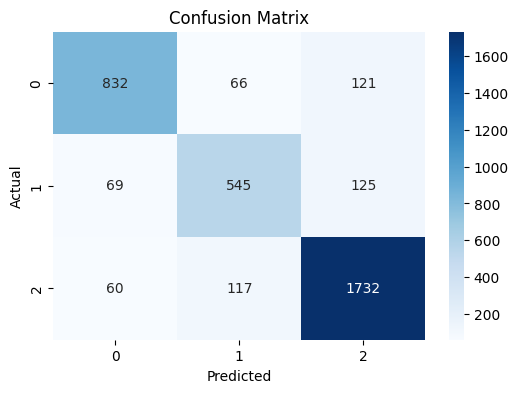


Model saved to 'simple_indobert_sentiment' directory


In [2]:
import pandas as pd
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
data = pd.read_csv('dataset_labeled.csv')

# 2. Simple Preprocessing
data = data.dropna(subset=['Normalize Text', 'Label'])
data['Normalize Text'] = data['Normalize Text'].astype(str).str[:512]  # Truncate long texts

# 3. Split Data
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Label'])

# 4. Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

# 5. Prepare Datasets
train_encodings = tokenizer(train_df['Normalize Text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['Normalize Text'].tolist(), truncation=True, padding=True, max_length=128)

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_df['Label'].tolist())
test_dataset = SentimentDataset(test_encodings, test_df['Label'].tolist())

# 6. Model Configuration
model = AutoModelForSequenceClassification.from_pretrained(
    "indolem/indobert-base-uncased",
    num_labels=3
)

# 7. Training Setup - Hanya parameter utama yang diatur
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,    # Learning rate default yang baik untuk fine-tuning
    per_device_train_batch_size=16,  # Batch size
    per_device_eval_batch_size=16,
    num_train_epochs=3,    # Jumlah epoch
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True
)

# 8. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# 9. Train
print("Starting training...")
trainer.train()

# 10. Evaluation
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

# 11. Classification Report
print("\nClassification Report:")
print(classification_report(
    test_df['Label'],
    preds,
    target_names=["NEGATIVE", "NEUTRAL", "POSITIVE"]
))

# 12. Simple Confusion Matrix
cm = confusion_matrix(test_df['Label'], preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 13. Save Model
model.save_pretrained("./simple_indobert_sentiment")
tokenizer.save_pretrained("./simple_indobert_sentiment")
print("\nModel saved to 'simple_indobert_sentiment' directory")